# Bergische Universität Wuppertal #

**Fakultät Mathematik und Naturwissenschaften** 

**Angewandte Mathematik/Numerische Analysis**

*Dr. L. Teng*

*L. Kapllani, M.Sc.* 

*Summerterm 2021*


# Computational Finance I
**Lab-Exercise No. 2**


## Write your data

In [1]:
print("First Name: Aleksandar")
print("Sure Name: Mitic")
print("Matriculation number: 2035177")
print("E-mail: aleksandar.mitic@uni-wuppertal.de")
print("Degree Type: Master") # Bachelor or Master
print("Degree Name: Master of science") # E.g. Master of Science in Computer Simulation in Science

First Name: Aleksandar
Sure Name: Mitic
Matriculation number: 2035177
E-mail: aleksandar.mitic@uni-wuppertal.de
Degree Type: Master
Degree Name: Master of science


# For the programming task write the corresponding Python codes that are asked in each section below.

# P2: Implied volatility
In the lecture we mentioned that the volatility of stock can not be directly observed.
Given option prices observed in the market, the volatility can be computed using Black-Scholes formula.
We will use the Newton-Raphson method to calculate the implied volatility.

## Import all necessary modules

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Start coding
**Note:** 
* Add code where you find the comment "# Add code here"
* Get the same output as it is presented in the Markdown text **Expected Output:**

## Define a function to calculate implied volatiliry using Newton-Raphson method

In [2]:
def impvol(S, r, T, K, C_market, sigma_0, tol):

    """
    Function that calculates implied volatility using Newton-Raphson method
    
        sigma(k+1) = sigma(k) - (C(sigma(k))- C_market)/k, 
    
    where sigma0 is an initial guess of volatility

    Input: 
          S       -> Stock price
          r       -> Interest rate
          T       -> Maturity
          K       -> Strike price
          C_market-> European option value (given)
          sigma_0 -> initial guess of implied volatility
          tol     -> tolerance for NR method

    Output:
         im_sigma -> Implied volatility
    """
    # Add code here
    k1= True
    while k1:
        # Formula for d1
        d1 = ( log(S/K) + (r+sigma_0*sigma_0/2.0)*T ) / ( sigma_0*sqrt(T) )
        # Using the relation between d1 and d2
        d2 = d1 - sigma_0*sqrt(T)
        # BC-Formula for Call option
        C = S*phi(d1) - K*np.exp(-r*T)*phi(d2)
        delta_x = S  * sqrt(T)  * normal_distr_func(d1)
        sigma_x = sigma_0 - (C - C_market)/delta_x
        if abs(sigma_x - sigma_0) < tol or abs(sigma_0 - C_market) < tol:
            break
            k1= False
        sigma_0 = sigma_x
    return sigma_x

def normal_distr_func(x):
    # probability density function for normal distribution
    return np.exp(-.5*x**2) / (sqrt(2*np.pi))
def phi(x):
    # cumulative distribution function
    return (1 + erf(x/sqrt(2))) / 2

Let $S=129,\,r=0,\,T=30/360.$ Test your code using the given market prices of European calls in the following table.
![title](table1.png)
For the Newton-Raphson method, use a tolerance of $10^{-10}$.

## Input parameters

In [3]:
# Input parameters
sigma_0 = 0.1
K = [*range(124, 137, 1)]
S0 = 129
r = 0
T = 30/360
C_market = [6.03, 5.23, 4.49, 3.79, 3.14, 2.55, 2.02, 1.59, 1.26, 1.00, 0.81, 0.67, 0.55]
tol = 1e-10

## Test the code based on above data: plot the graph, what do you observe?

K| [124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136]
C| [6.03, 5.23, 4.49, 3.79, 3.14, 2.55, 2.02, 1.59, 1.26, 1.0, 0.81, 0.67, 0.55]


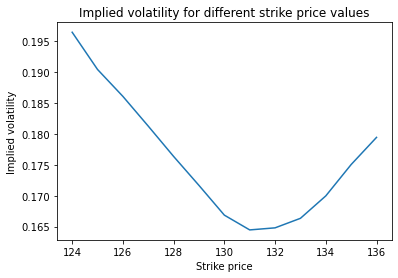

In [4]:
# Implement impvol function to calculate the implied volatility for each strike price and option price
# Add code here
A_x = np.zeros(len(C_market))
for i in range(0, len(C_market)):
    A_x[i] = impvol(S0, r, T, K[i], C_market[i], sigma_0, tol)
plt.plot(K, A_x)
plt.title('Implied volatility for different strike price values')
plt.ylabel('Implied volatility')
plt.xlabel('Strike price')
print('K|' , K)
print('C|' , C_market)

**Expected Output:**
![title](figure1.png)

### Will the implied volatilities using the corresponding market prices of European puts be same?

In [5]:
# Answer with a print statement
# Add code here
print('No, they wouldnt be the same because in Black-Scholes formula for the call and put is different therefore the option values for call and put will be different.')

No, they wouldnt be the same because in Black-Scholes formula for the call and put is different therefore the option values for call and put will be different.


In the lecture we have seen that the Black-Scholes model can be extended by including a time-dependent volatility function. Given the volatility function
$$ \sigma(t) = \sigma_0 \exp(−at) + b(1−\exp(−at)),$$ 
ﬁnd the optimal value of parameters $\sigma_0, a, b$ by ﬁtting the prices of the extended BS-formula to the market prices given in the following table, where $S = 129, r = 0, K = 129$. For the ﬁtting you can use any optimization method, e.g., least squares.
![title](table2.png)

Plot a graph of the volatility function using the obtained optimal parameter values and compare it to the corresponding implied volatility for diﬀerent maturities.

## New input

In [6]:
# New input
Time = [1/12, 1/4, 1/2, 1]
Value = [2.55, 4.49, 6.70, 10.13]
Price = 129
Strike = 129
Rate = 0
Sigma_0 = 0.2
Tol = 1e-10

## Apply NR for the new input

In [7]:
# Add code here
B_x = np.zeros(len(Time))
for i in range(0, len(Time)):
    B_x[i] = impvol(Price, Rate, Time[i], Strike, Value[i], Sigma_0, Tol)
print('T|' , Time)
print('C|' , Value)

T| [0.08333333333333333, 0.25, 0.5, 1]
C| [2.55, 4.49, 6.7, 10.13]


## Define a function for our given time dependent volatility 

In [10]:
def func(t, sigma_0, a, b):
    """
    Function that creates the time dependent volatility function
        sigma(t) = sigma_0 * exp(−a*t) + b*(1−exp(−a*t))
    Input: 
          t       -> time
          sigma_0 -> Parameter
          a       -> Parameter
          b       -> Parameter
          
    Output:
         sigma(t) -> Time dependent volatility
    """
    # Add code here
    sigma_t = sigma_0 * np.exp(-a*t) + b*(1-np.exp(-a*t)) 
    return sigma_t

## Find optimal values using least squares method
**Hint:`curve_fit()` function form scipy optimization library can be used**

In [11]:
# Add code here
p_opt, p_cov = opt.curve_fit(func, Time, B_x)
print('sigma0 = %.6f a = %.6f b = %.6f' % tuple (p_opt))

sigma0 = 0.168393 a = 0.140049 b = 0.389585


**Expected Output:**

`sigma0 = 0.168393`
 `a = 0.140051`
 `b = 0.389581`
 

## Plotting our estimated volatility function

Text(0, 0.5, 'Volatility')

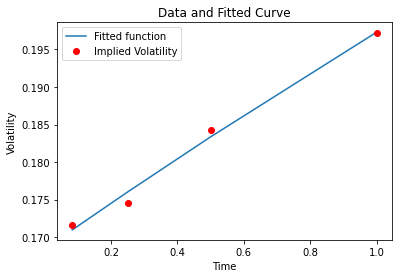

In [16]:
# Add your code here
sigma_time = np.zeros(len(Time))
for i in range(0, len(Time)):
    # Formula for our volatility function using the obtained optimal parameter values, where sigma_0 = popt[0], a = popt[1], b = popt[2]
    sigma_time[i] = p_opt[0] * np.exp(-p_opt[1] * Time[i]) + p_opt[2]*(1-np.exp(-p_opt[1]*Time[i]))

# plot the data points and our estimated volatility function
plt.plot(Time, sigma_time, label='Fitted function')
plt.plot(Time, B_x , 'ro', label='Implied Volatility')
plt.legend()
plt.title('Data and Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Volatility')

**Expected Output:**
![title](figure2.png)

**Return the solutions of the programming task $\href{https://moodle.uni-wuppertal.de/mod/assign/view.php?id=774696}{{here}}$ until Wednesday, June 9. The assignment can be done in groups of 1-2 persons. The solution should be presented within the following 2 weeks via an online arranged ZOOM meeting with M.Sc. Lorenc Kapllani.**

In [57]:
# feel free to use this cell for additional tests

In [270]:
# feel free to use this cell for additional tests

In [271]:
# feel free to use this cell for additional tests

In [271]:
# feel free to use this cell for additional tests

In [ ]:
# feel free to use this cell for additional tests